In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
fp = open('/content/drive/MyDrive/io_test.txt', 'w', encoding='utf-8')

fp.write('Korea\n')
fp.write('대한민국\n')
dd
fp.close()

In [3]:
! git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git

Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 91, done.
remote: Counting objects: 100% (91/91), done.
remote: Compressing objects: 100% (85/85), done.
remote: Total 91 (delta 43), reused 22 (delta 6), pack-reused 0
Unpacking objects: 100% (91/91), done.


In [4]:
ls

drive/  Mecab-ko-for-Google-Colab/  sample_data/


In [5]:
cd Mecab-ko-for-Google-Colab

/content/Mecab-ko-for-Google-Colab


In [6]:
ls

images/                                    LICENSE
install_mecab-ko_on_colab190912.sh         README.md
install_mecab-ko_on_colab_light_210108.sh


In [ ]:
! bash install_mecab-ko_on_colab190912.sh

In [14]:
from konlpy.tag import Mecab
mecab = Mecab()
text = u"""이제 구글 코랩에서 Mecab-ko라이브러리 사용이 가능합니다. 읽어주셔서 감사합니다."""
nouns = mecab.nouns(text)
print(nouns)

['구글', '코', '랩', '라이브러리', '사용', '가능', '감사']


In [9]:
ls

images/                                    LICENSE
install_mecab-ko_on_colab190912.sh         README.md
install_mecab-ko_on_colab_light_210108.sh


In [10]:
cd ..

/content


In [11]:
ls

drive/                       mecab-ko-dic-2.1.1-20180720/        sample_data/
mecab-0.996-ko-0.9.2/        mecab-ko-dic-2.1.1-20180720.tar.gz
mecab-0.996-ko-0.9.2.tar.gz  Mecab-ko-for-Google-Colab/


In [12]:
cd drive/My Drive/AI_study/Team10_Project/csv_file

/content/drive/My Drive/AI_study/Team10_Project/csv_file


In [13]:
ls

kr18.csv  kr20.csv


In [15]:
import pandas as pd

import konlpy
from konlpy.tag import Mecab
from tqdm import tqdm   #진행속도 표시

from wordcloud import WordCloud
import matplotlib as mpl
import matplotlib.pyplot as plt

# WordCloud 한글 적용
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 5 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Selecting previously unselected package fonts-nanum.
(Reading database ... 155518 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [16]:
kr18 = pd.read_csv("kr18.csv")
kr20 = pd.read_csv("kr20.csv")

In [48]:
test_kr20 = kr20.head(5)
# text = kr20['title'].str.cat(sep=' ')
# text = test_kr20['title'].str.cat(sep=' ')

In [49]:
title_list = [ tokenizer.pos(x) for x in tqdm(test_kr20['title']) ]
print(title_list)

100%|██████████| 5/5 [00:00<00:00, 3620.77it/s]

[[('안녕', 'NNG'), ('하', 'XSV'), ('세요', 'EP+EC'), ('보', 'VX'), ('겸', 'NNB'), ('입니다', 'VCP+EC')], [('부', 'XPN'), ('락토스', 'NNG'), ('의', 'JKG'), ('계획', 'NNG'), ('[', 'SSO'), ('총', 'MM'), ('몇', 'MM'), ('명', 'NNBC'), ('프리퀄', 'NNP'), (']', 'SSC')], [('평생', 'NNG'), ('반성', 'NNG'), ('하', 'XSV'), ('면서', 'EC'), ('살', 'VV'), ('겠', 'EP'), ('습니다', 'EF'), ('.', 'SF')], [('안녕하세요', 'UNKNOWN'), ('꽈뚜룹입니다', 'UNKNOWN'), ('.', 'SF')], [('박진영', 'NNP'), ('(', 'SSO'), ('J', 'SL'), ('.', 'SY'), ('Y', 'SL'), ('.', 'SY'), ('Park', 'SL'), (')', 'SSC'), ('When', 'SL'), ('We', 'SL'), ('Disco', 'SL'), ('(', 'SSO'), ('Duet', 'SL'), ('with', 'SL'), ('선미', 'NNP'), (')', 'SSC'), ('M', 'SL'), ('/', 'SC'), ('V', 'SL')]]


In [54]:
title_nouns = []

for x in range(len(title_list)):
  for i in range(len(title_list[x])):
    if title_list[x][i][1] == 'NNG':
      if len(title_list[x][i][0]) == 1:   # 한글자 명사 제거
        continue
      title_nouns.append(title_list[x][i][0])
title_nouns = ' '.join(title_nouns)
title_nouns

'안녕 락토스 계획 평생 반성'

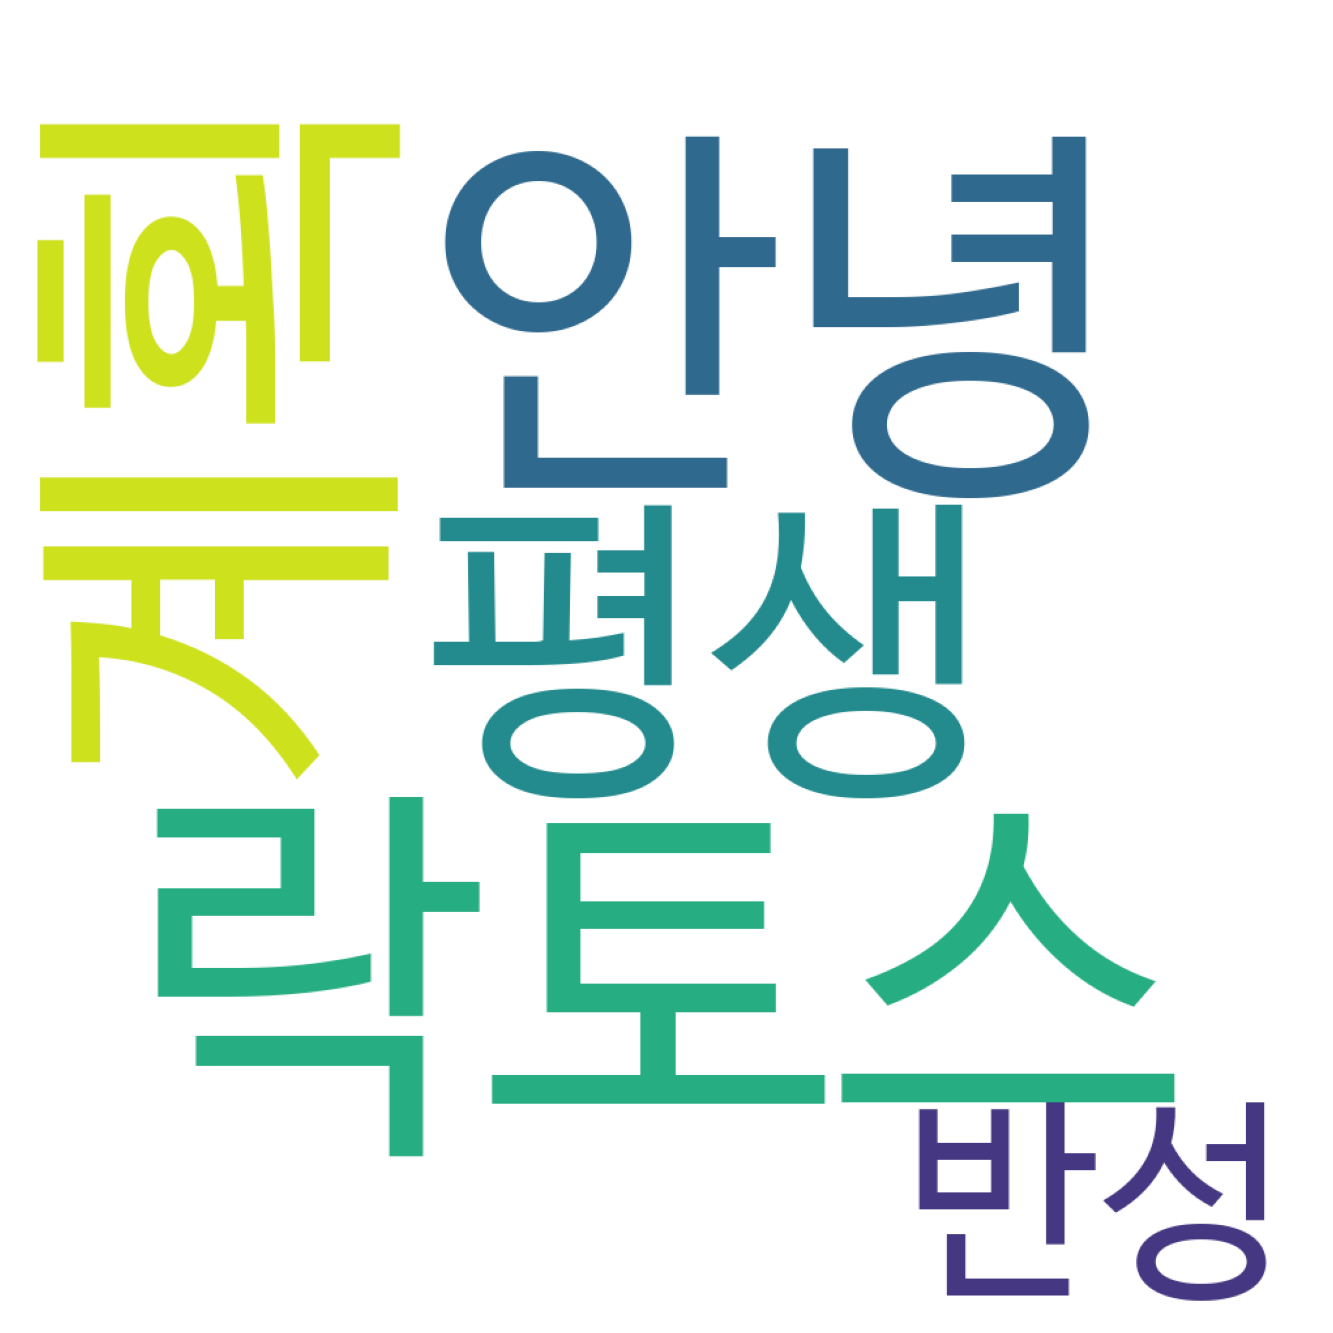

In [55]:
wc = WordCloud(font_path=fontpath, background_color='white', width=1000, height=1000, max_words=200, max_font_size=300)
cloud = wc.generate(title_nouns)
cloud.to_file('wordcloud_title.png')

plt.figure(figsize=(12,12))
plt.imshow(cloud)
plt.axis('off')			# X, Y 축 생략
plt.show()

100%|██████████| 88802/88802 [00:08<00:00, 10723.38it/s]


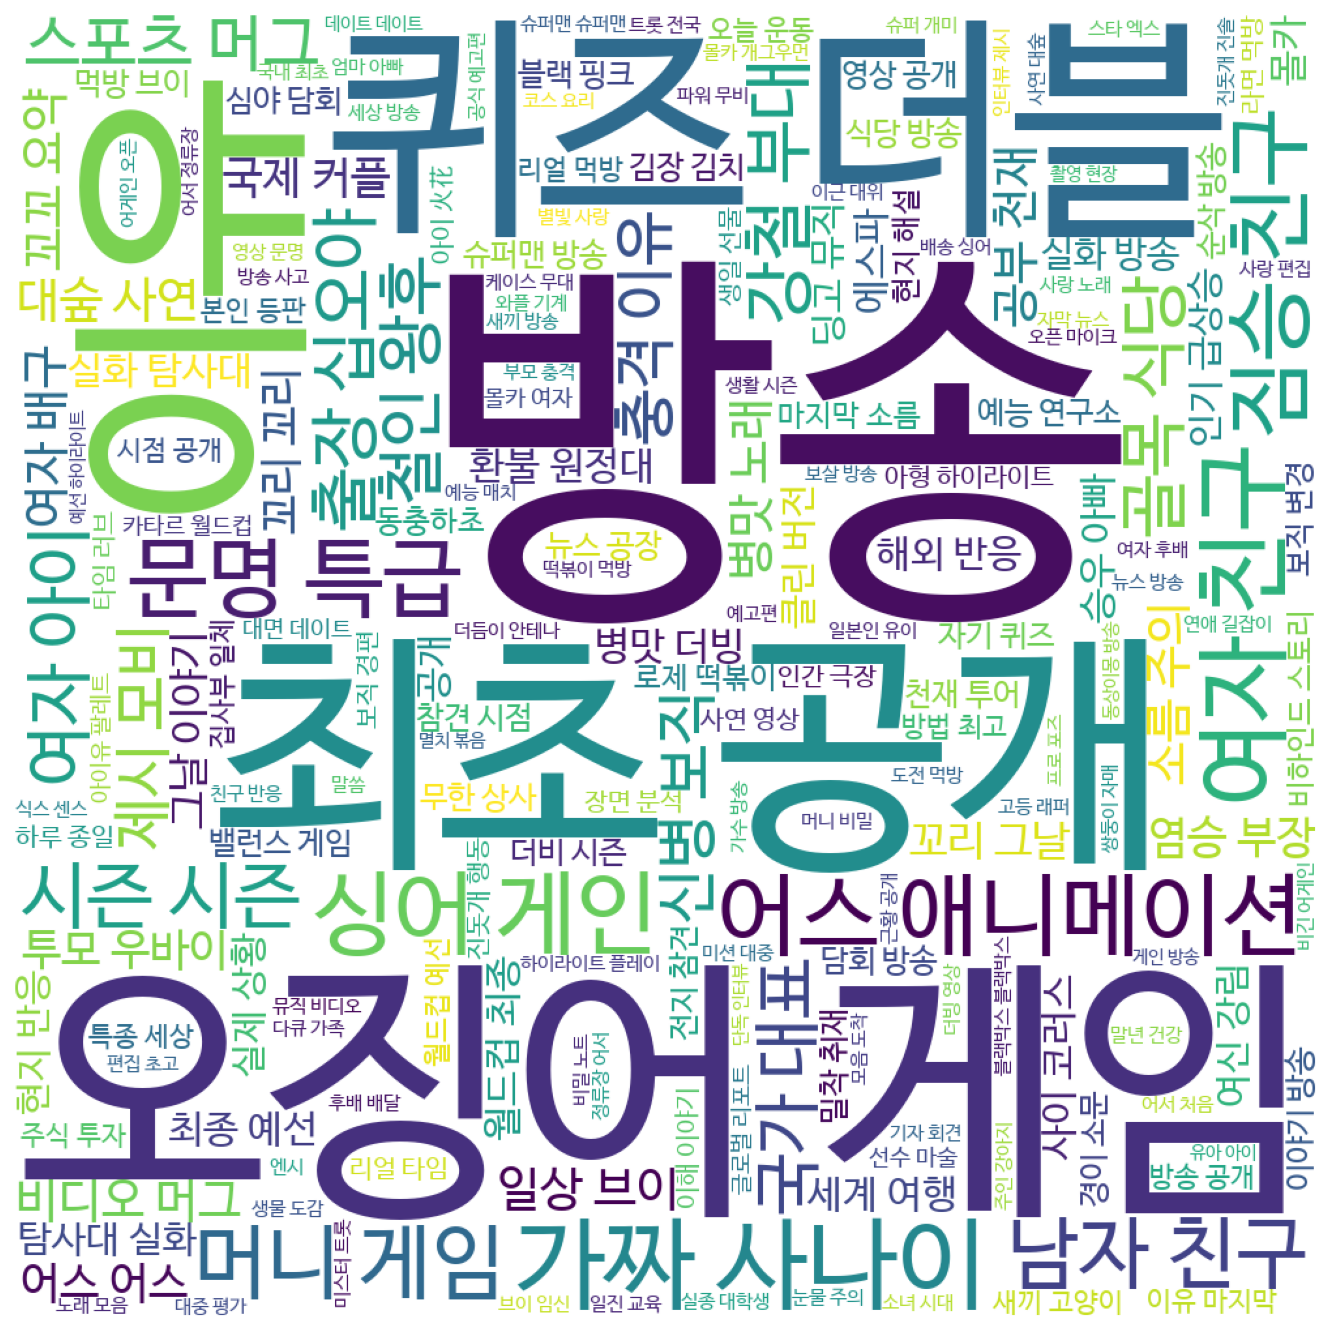

In [56]:
tokenizer = Mecab()

# (value, key) 형식으로 토큰화 -> 
title_list = [ tokenizer.pos(x) for x in tqdm(kr20['title']) ]


# 2글자 이상 명사(NNG) 추출
title_nouns = []

for x in range(len(title_list)):
  for i in range(len(title_list[x])):
    if title_list[x][i][1] == 'NNG':
      if len(title_list[x][i][0]) == 1:   # 한글자 명사 제거
        continue
      title_nouns.append(title_list[x][i][0])
title_nouns = ' '.join(title_nouns)


# WordCloud 설정, 저장 및 출력, font_path 설정 필수!
wc = WordCloud(font_path=fontpath, background_color='white', width=1000, height=1000, max_words=200, max_font_size=300)
cloud = wc.generate(title_nouns)
cloud.to_file('wordcloud_title.png')

plt.figure(figsize=(12,12))
plt.imshow(cloud)
plt.axis('off')			# X, Y 축 생략
plt.show()